In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [2]:
pip install gseapy

     |████████████████████████████████| 1.5 MB 1.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 964 kB 3.4 MB/s eta 0:00:01
  Using cached grequests-0.6.0-py3-none-any.whl (5.2 kB)
     |████████████████████████████████| 47 kB 5.2 MB/s eta 0:00:01
  Using cached easydev-0.12.0-py3-none-any.whl
     |████████████████████████████████| 4.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 4.9 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached gevent-21.12.0-cp38-cp38-macosx_10_14_x86_64.whl (1.9 MB)
  Using cached zope.interface-5.4.0-cp38-cp38-macosx_10_14_x86_64.whl (208 kB)
     |████████████████████████████████| 93 kB 2.1 MB/s eta 0:00:011
  Using cached zope.event-4.5.0-py2.py3-none-any.whl (6.8 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  ERROR: Command errored 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.9.12) on 2023-02-02 11:19.


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.6


In [4]:
import os
os.chdir('F:/Ko/PD-1_responders')

In [5]:
import scanpy.external as sce

In [6]:
# 69 patients immune datasets

adata_69_imn = sc.read('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/Group_ABC_after_celltype_clustering_Myel_Tcell_group_added.h5ad')

In [7]:
adata_69_imn.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,louvain,batch,total_counts_ribo,...,percent_mt2,n_counts,celltype,crude,celltype_detail,patient_cluster,T_patient_cluster,Myeloid_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4
AAACCTGAGCTGCAAG-1-0-0,696.0,680,837.446228,22.309502,2.663992,tumor,P686,9,0,97.282417,...,0.026640,837.446228,M1_Macro_1,Myeloid cell,M1 Macrophage,Group A,T_1,Myeloid_1,T_2,Myeloid_2
AAACCTGAGTAGCCGA-1-0-0,3934.0,3875,1451.257568,18.802568,1.295605,tumor,P686,4,0,198.197769,...,0.012956,1451.257568,CD8_T_cell_1,T cell,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2
AAACCTGCAAGAGGCT-1-0-0,674.0,668,882.023010,11.229170,1.273115,tumor,P686,4,0,213.666718,...,0.012731,882.023010,CD8_T_cell_1,T cell,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2
AAACCTGCACTGAAGG-1-0-0,720.0,708,966.913330,19.870264,2.055020,tumor,P686,11,0,186.630112,...,0.020550,966.913330,B_cell_3,B cell,B cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2
AAACCTGCAGTATCTG-1-0-0,1014.0,1000,954.569214,18.788149,1.968233,tumor,P686,4,0,221.148575,...,0.019682,954.569214,CD8_T_cell_1,T cell,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAGCCATT-1-24-2,4456.0,4321,1865.612427,29.546848,1.583761,tumor,P001,0,2,172.502136,...,0.015838,1865.612427,CD4_T_cell_1,T cell,CD4 T cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3
TTTGGTTGTCACCCAG-1-24-2,689.0,642,487.017822,17.679008,3.630054,tumor,P001,5,2,59.435638,...,0.036301,487.017822,B_cell_2,B cell,B cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3
TTTGTCAAGCGCTTAT-1-24-2,248.0,233,519.526245,8.050291,1.549545,tumor,P001,5,2,57.140697,...,0.015495,519.526245,B_cell_2,B cell,B cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2634,1966.213501,24.433256,1.242655,tumor,P001,7,2,120.637726,...,0.012427,1966.213501,Texh_2,T cell,exhausted T cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3


In [8]:
# PD-1 response_based_all cell
adata_PD = sc.read('all_patients_final.h5ad')

In [9]:
adata_PD.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,patient,file_name,leiden,batch,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,celltype,crude,celltype_detail,response
CTTGCCGTCGGA-0,3741,3635,1397.243774,19.050234,1.363415,nonresponder_1,PD1-D1,8,0,101.290787,7.249329,1.210672,0.086647,T cell,NaN,CD8 T cell,Nonresponders
CGAGTCACACAT-0,3563,3487,1407.560303,23.679771,1.682327,nonresponder_1,PD1-D1,5,0,105.904358,7.523966,1.038069,0.073750,Monocyte,NaN,Monocyte,Nonresponders
GAGCGACTGGCT-0,3339,3279,1409.313477,22.003889,1.561320,nonresponder_1,PD1-D1,1,0,86.078606,6.107840,0.662683,0.047022,Monocyte,NaN,Monocyte,Nonresponders
CCTTCACGATTC-0,3410,3346,1409.737183,20.661764,1.465647,nonresponder_1,PD1-D1,5,0,83.888268,5.950632,1.622554,0.115096,Monocyte,NaN,Monocyte,Nonresponders
TACATCATATTG-0,3188,3122,1406.716797,21.422604,1.522880,nonresponder_1,PD1-D1,10,0,114.737907,8.156433,1.387298,0.098620,Monocyte,NaN,Monocyte,Nonresponders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5,608,593,2097.263916,75.106140,3.581149,responder_3,PD1-S3,6,5,265.869873,12.676987,4.590319,0.218872,B cell,NaN,B cell,Responders
GCTCACGGCAGG-5,560,541,2078.378662,57.489052,2.766053,responder_3,PD1-S3,3,5,346.141968,16.654423,8.568939,0.412290,T cell,NaN,CD8 T cell,Responders
GTAAATTAGCCA-5,609,599,2114.809326,59.998657,2.837072,responder_3,PD1-S3,2,5,156.074402,7.380070,9.884173,0.467379,Monocyte,NaN,Monocyte,Responders
TCCCCCGTAAAA-5,581,575,2124.718262,27.837864,1.310191,responder_3,PD1-S3,2,5,177.390732,8.348906,0.000000,0.000000,Monocyte,NaN,Monocyte,Responders


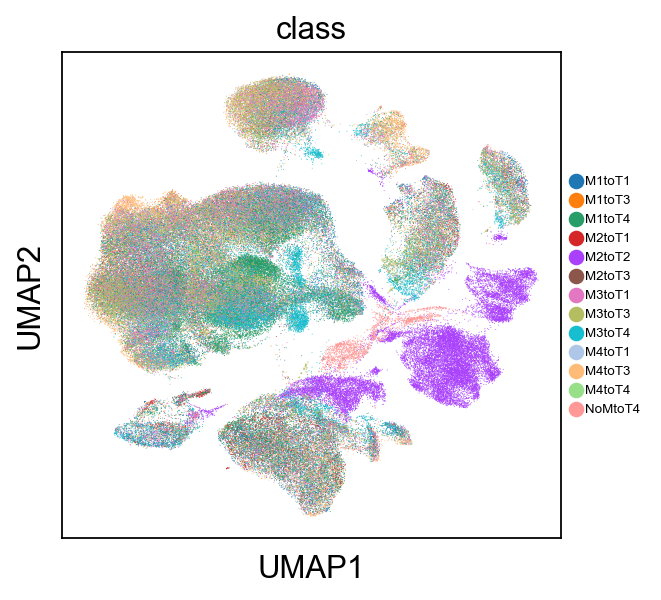

In [10]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ['P104','P087','P032','P016','P036','P089','P083'],
             'M1toT2': [],
             'M1toT3': ['P063','P056'],
             'M1toT4': ['P009B','P075','P011','P052','P047','P037','P091','P022','P074','P038','P082'],
             'M2toT1': ['P010'],
             'M2toT2': ['P686','P658','P846','P944','P585','P866','P787','P181','P986','P051'],
             'M2toT3': ['P130'],
             'M2toT4': [],
             'M3toT1': ['P017','P023','P107','P076','P021','P008','P094','P079','P084'],
             'M3toT2': [],
             'M3toT3': ['P048','P062','P027','P049','P065','P002','P057','P001','P061','P015'],
             'M3toT4': ['P040','P031','P044','P026','P080','P024','P042'],
             'M4toT1': ['P054','P019'],
             'M4toT2': [],
             'M4toT3': ['P128','P127','P126','P030','P028','P012','P020'],
             'M4toT4': ['P039'],
             'NoMtoT4': ['P009A']
            }

# Initialize empty column in cell metadata
adata_69_imn.obs['class'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_69_imn.obs.patient).isin(cell_dict[i])
    adata_69_imn.obs.loc[ind,'class'] = i

sc.pl.umap(adata_69_imn, color=['class'], legend_loc='right margin', legend_fontsize=6)#, save='umap_allcell_Myeloid_to_T_cluster44.pdf')


In [11]:
adata_PD.obs['class']= adata_PD.obs['response']
adata_PD.obs['class']

CTTGCCGTCGGA-0    Nonresponders
CGAGTCACACAT-0    Nonresponders
GAGCGACTGGCT-0    Nonresponders
CCTTCACGATTC-0    Nonresponders
TACATCATATTG-0    Nonresponders
                      ...      
AAAGCTGCGCGC-5       Responders
GCTCACGGCAGG-5       Responders
GTAAATTAGCCA-5       Responders
TCCCCCGTAAAA-5       Responders
TTGCCTTCGAAT-5       Responders
Name: class, Length: 23513, dtype: category
Categories (2, object): ['Nonresponders', 'Responders']

# only with MaT4, MbT2, McT4

In [56]:
adata_69_imn_3 = adata_69_imn[adata_69_imn.obs['class'].isin(['M1toT4','M2toT2','M3toT4'])]

In [57]:
adata = adata_69_imn_3.concatenate(adata_PD)
adata

AnnData object with n_obs × n_vars = 99662 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'class_3', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_b

In [58]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,louvain,batch,total_counts_ribo,...,patient_cluster,T_patient_cluster,Myeloid_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,class_3,file_name,leiden,response
AAACCTGAGCTGCAAG-1-0-0-0,696.0,680,837.446228,22.309502,2.663992,tumor,P686,9,0,97.282417,...,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,M2toT2,NaN,NaN,NaN
AAACCTGAGTAGCCGA-1-0-0-0,3934.0,3875,1451.257568,18.802568,1.295605,tumor,P686,4,0,198.197769,...,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,M2toT2,NaN,NaN,NaN
AAACCTGCAAGAGGCT-1-0-0-0,674.0,668,882.023010,11.229170,1.273115,tumor,P686,4,0,213.666718,...,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,M2toT2,NaN,NaN,NaN
AAACCTGCACTGAAGG-1-0-0-0,720.0,708,966.913330,19.870264,2.055020,tumor,P686,11,0,186.630112,...,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,M2toT2,NaN,NaN,NaN
AAACCTGCAGTATCTG-1-0-0-0,1014.0,1000,954.569214,18.788149,1.968233,tumor,P686,4,0,221.148575,...,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,M2toT2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5-1,608.0,593,2097.263916,75.106140,3.581149,NaN,responder_3,NaN,1,265.869873,...,NaN,NaN,NaN,NaN,NaN,Responders,responder_3,PD1-S3,6,Responders
GCTCACGGCAGG-5-1,560.0,541,2078.378662,57.489052,2.766053,NaN,responder_3,NaN,1,346.141968,...,NaN,NaN,NaN,NaN,NaN,Responders,responder_3,PD1-S3,3,Responders
GTAAATTAGCCA-5-1,609.0,599,2114.809326,59.998657,2.837072,NaN,responder_3,NaN,1,156.074402,...,NaN,NaN,NaN,NaN,NaN,Responders,responder_3,PD1-S3,2,Responders
TCCCCCGTAAAA-5-1,581.0,575,2124.718262,27.837864,1.310191,NaN,responder_3,NaN,1,177.390732,...,NaN,NaN,NaN,NaN,NaN,Responders,responder_3,PD1-S3,2,Responders


In [59]:
adata

AnnData object with n_obs × n_vars = 99662 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'class_3', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_b

In [60]:
adata.raw = adata

In [61]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata)
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:00:48)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 33 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:22)


In [62]:
adata.obs['class'] = adata.obs['class'].astype('category')
adata.obs['class']

AAACCTGAGCTGCAAG-1-0-0-0        M2toT2
AAACCTGAGTAGCCGA-1-0-0-0        M2toT2
AAACCTGCAAGAGGCT-1-0-0-0        M2toT2
AAACCTGCACTGAAGG-1-0-0-0        M2toT2
AAACCTGCAGTATCTG-1-0-0-0        M2toT2
                               ...    
AAAGCTGCGCGC-5-1            Responders
GCTCACGGCAGG-5-1            Responders
GTAAATTAGCCA-5-1            Responders
TCCCCCGTAAAA-5-1            Responders
TTGCCTTCGAAT-5-1            Responders
Name: class, Length: 99662, dtype: category
Categories (5, object): ['M1toT4', 'M2toT2', 'M3toT4', 'Nonresponders', 'Responders']

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_class']`


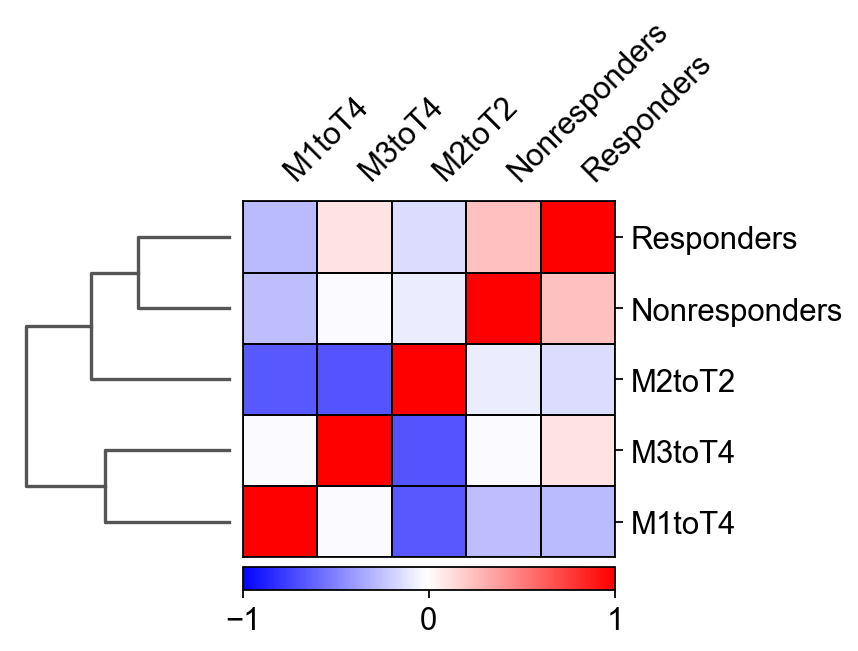

In [67]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata, 'class')
sc.pl.correlation_matrix(adata, groupby='class', save='_correlation_matrix_by_3_class_and_PD1_patients.pdf')

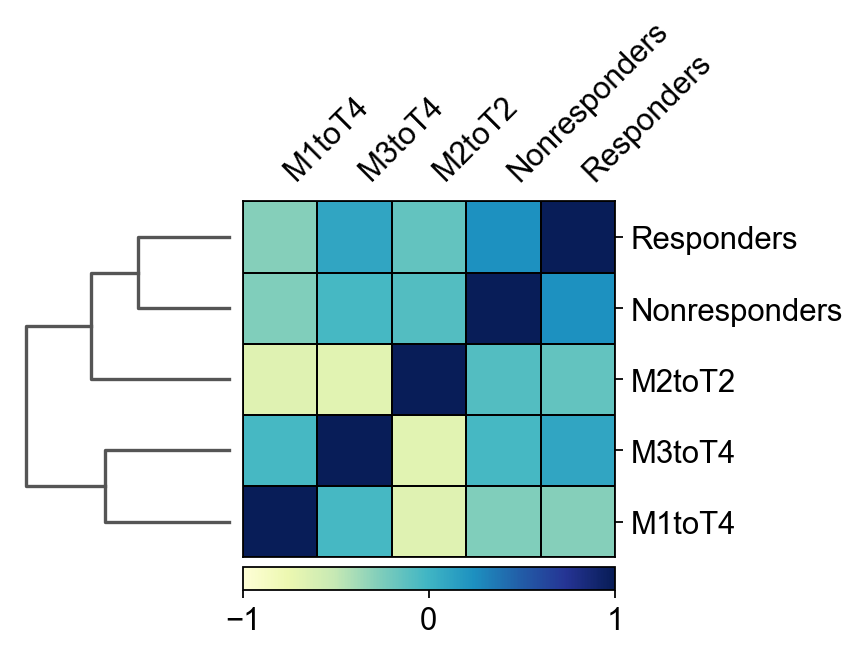

In [70]:
sc.pl.correlation_matrix(adata, groupby='class',cmap='YlGnBu', save='_correlation_matrix_by_MtoT_class_and_Nonresponders_and_responders_YlGr.pdf')

# with all MaT1~ MdT4

In [35]:
#adata_69_imn = adata_69_imn[adata_69_imn.obs['class'].isin(['M1toT4','M2toT2','M3toT4'])]

In [23]:
adata_1 = adata_69_imn.concatenate(adata_PD)
adata_1

AnnData object with n_obs × n_vars = 197999 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-0

In [24]:
adata_1.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,louvain,batch,total_counts_ribo,...,celltype_detail,patient_cluster,T_patient_cluster,Myeloid_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,file_name,leiden,response
AAACCTGAGCTGCAAG-1-0-0-0,696.0,680,837.446228,22.309502,2.663992,tumor,P686,9,0,97.282417,...,M1 Macrophage,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGAGTAGCCGA-1-0-0-0,3934.0,3875,1451.257568,18.802568,1.295605,tumor,P686,4,0,198.197769,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCAAGAGGCT-1-0-0-0,674.0,668,882.023010,11.229170,1.273115,tumor,P686,4,0,213.666718,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCACTGAAGG-1-0-0-0,720.0,708,966.913330,19.870264,2.055020,tumor,P686,11,0,186.630112,...,B cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCAGTATCTG-1-0-0-0,1014.0,1000,954.569214,18.788149,1.968233,tumor,P686,4,0,221.148575,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5-1,608.0,593,2097.263916,75.106140,3.581149,NaN,responder_3,NaN,1,265.869873,...,B cell,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,6,Responders
GCTCACGGCAGG-5-1,560.0,541,2078.378662,57.489052,2.766053,NaN,responder_3,NaN,1,346.141968,...,CD8 T cell,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,3,Responders
GTAAATTAGCCA-5-1,609.0,599,2114.809326,59.998657,2.837072,NaN,responder_3,NaN,1,156.074402,...,Monocyte,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,2,Responders
TCCCCCGTAAAA-5-1,581.0,575,2124.718262,27.837864,1.310191,NaN,responder_3,NaN,1,177.390732,...,Monocyte,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,2,Responders


In [25]:
adata_1

AnnData object with n_obs × n_vars = 197999 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-0

In [26]:
adata_1.raw = adata_1

In [27]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata_1, svd_solver='arpack')
sc.pp.neighbors(adata_1, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata_1)
sc.tl.umap(adata_1)

computing PCA
    with n_comps=50
    finished (0:02:28)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:49)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:50)


In [28]:
adata_1.obs['class'] = adata_1.obs['class'].astype('category')
adata_1.obs['class']

AAACCTGAGCTGCAAG-1-0-0-0        M2toT2
AAACCTGAGTAGCCGA-1-0-0-0        M2toT2
AAACCTGCAAGAGGCT-1-0-0-0        M2toT2
AAACCTGCACTGAAGG-1-0-0-0        M2toT2
AAACCTGCAGTATCTG-1-0-0-0        M2toT2
                               ...    
AAAGCTGCGCGC-5-1            Responders
GCTCACGGCAGG-5-1            Responders
GTAAATTAGCCA-5-1            Responders
TCCCCCGTAAAA-5-1            Responders
TTGCCTTCGAAT-5-1            Responders
Name: class, Length: 197999, dtype: category
Categories (15, object): ['M1toT1', 'M1toT3', 'M1toT4', 'M2toT1', ..., 'M4toT4', 'NoMtoT4', 'Nonresponders', 'Responders']

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_class']`


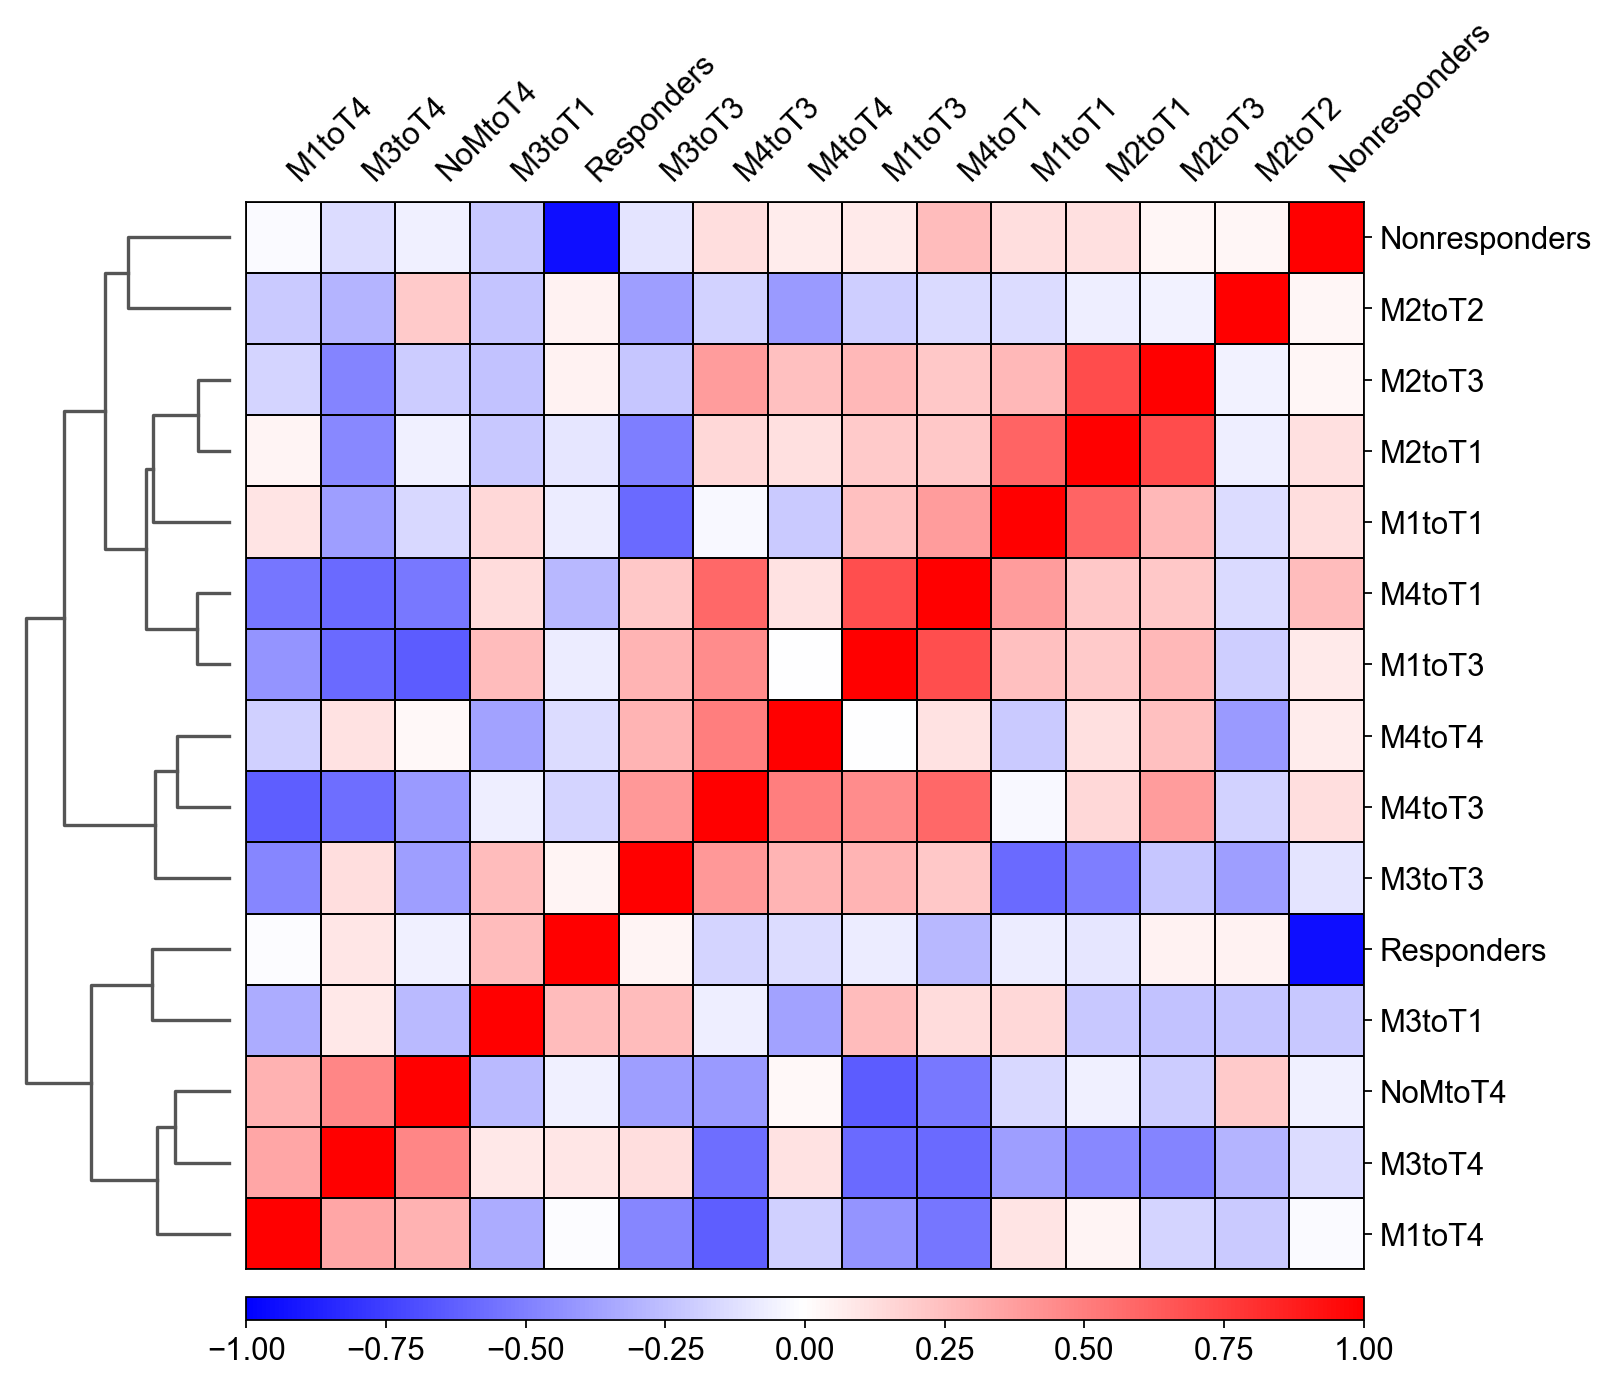

In [69]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata_1, 'class')
sc.pl.correlation_matrix(adata_1, groupby='class', save='_correlation_matrix_by_MtoT_class_and_Nonresponders_and_responders_RdBl.pdf')

# with MaT4, MbT2, McT4 and responders

In [ ]:
#adata_69_imn = adata_69_imn[adata_69_imn.obs['class'].isin(['M1toT4','M2toT2','M3toT4'])]

In [12]:
adata_PD.obs['class']

CTTGCCGTCGGA-0    Nonresponders
CGAGTCACACAT-0    Nonresponders
GAGCGACTGGCT-0    Nonresponders
CCTTCACGATTC-0    Nonresponders
TACATCATATTG-0    Nonresponders
                      ...      
AAAGCTGCGCGC-5       Responders
GCTCACGGCAGG-5       Responders
GTAAATTAGCCA-5       Responders
TCCCCCGTAAAA-5       Responders
TTGCCTTCGAAT-5       Responders
Name: class, Length: 23513, dtype: category
Categories (2, object): ['Nonresponders', 'Responders']

In [13]:
adata_PD_R = adata_PD[adata_PD.obs['class']=='Responders']

In [14]:
adata_2 = adata_69_imn.concatenate(adata_PD_R)
adata_2

AnnData object with n_obs × n_vars = 185754 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-0

In [15]:
adata_2.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,louvain,batch,total_counts_ribo,...,celltype_detail,patient_cluster,T_patient_cluster,Myeloid_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,file_name,leiden,response
AAACCTGAGCTGCAAG-1-0-0-0,696.0,680,837.446228,22.309502,2.663992,tumor,P686,9,0,97.282417,...,M1 Macrophage,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGAGTAGCCGA-1-0-0-0,3934.0,3875,1451.257568,18.802568,1.295605,tumor,P686,4,0,198.197769,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCAAGAGGCT-1-0-0-0,674.0,668,882.023010,11.229170,1.273115,tumor,P686,4,0,213.666718,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCACTGAAGG-1-0-0-0,720.0,708,966.913330,19.870264,2.055020,tumor,P686,11,0,186.630112,...,B cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCAGTATCTG-1-0-0-0,1014.0,1000,954.569214,18.788149,1.968233,tumor,P686,4,0,221.148575,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5-1,608.0,593,2097.263916,75.106140,3.581149,NaN,responder_3,NaN,1,265.869873,...,B cell,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,6,Responders
GCTCACGGCAGG-5-1,560.0,541,2078.378662,57.489052,2.766053,NaN,responder_3,NaN,1,346.141968,...,CD8 T cell,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,3,Responders
GTAAATTAGCCA-5-1,609.0,599,2114.809326,59.998657,2.837072,NaN,responder_3,NaN,1,156.074402,...,Monocyte,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,2,Responders
TCCCCCGTAAAA-5-1,581.0,575,2124.718262,27.837864,1.310191,NaN,responder_3,NaN,1,177.390732,...,Monocyte,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,2,Responders


In [16]:
adata_2

AnnData object with n_obs × n_vars = 185754 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-0

In [17]:
adata_2.raw = adata_2

In [18]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata_2, svd_solver='arpack')
sc.pp.neighbors(adata_2, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata_2)
sc.tl.umap(adata_2)

computing PCA
    with n_comps=50
    finished (0:01:37)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:37)
running Leiden clustering
    finished: found 31 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:52)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:39)


In [19]:
adata_2.obs['class'] = adata_2.obs['class'].astype('category')
adata_2.obs['class']

AAACCTGAGCTGCAAG-1-0-0-0        M2toT2
AAACCTGAGTAGCCGA-1-0-0-0        M2toT2
AAACCTGCAAGAGGCT-1-0-0-0        M2toT2
AAACCTGCACTGAAGG-1-0-0-0        M2toT2
AAACCTGCAGTATCTG-1-0-0-0        M2toT2
                               ...    
AAAGCTGCGCGC-5-1            Responders
GCTCACGGCAGG-5-1            Responders
GTAAATTAGCCA-5-1            Responders
TCCCCCGTAAAA-5-1            Responders
TTGCCTTCGAAT-5-1            Responders
Name: class, Length: 185754, dtype: category
Categories (14, object): ['M1toT1', 'M1toT3', 'M1toT4', 'M2toT1', ..., 'M4toT3', 'M4toT4', 'NoMtoT4', 'Responders']

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_class']`


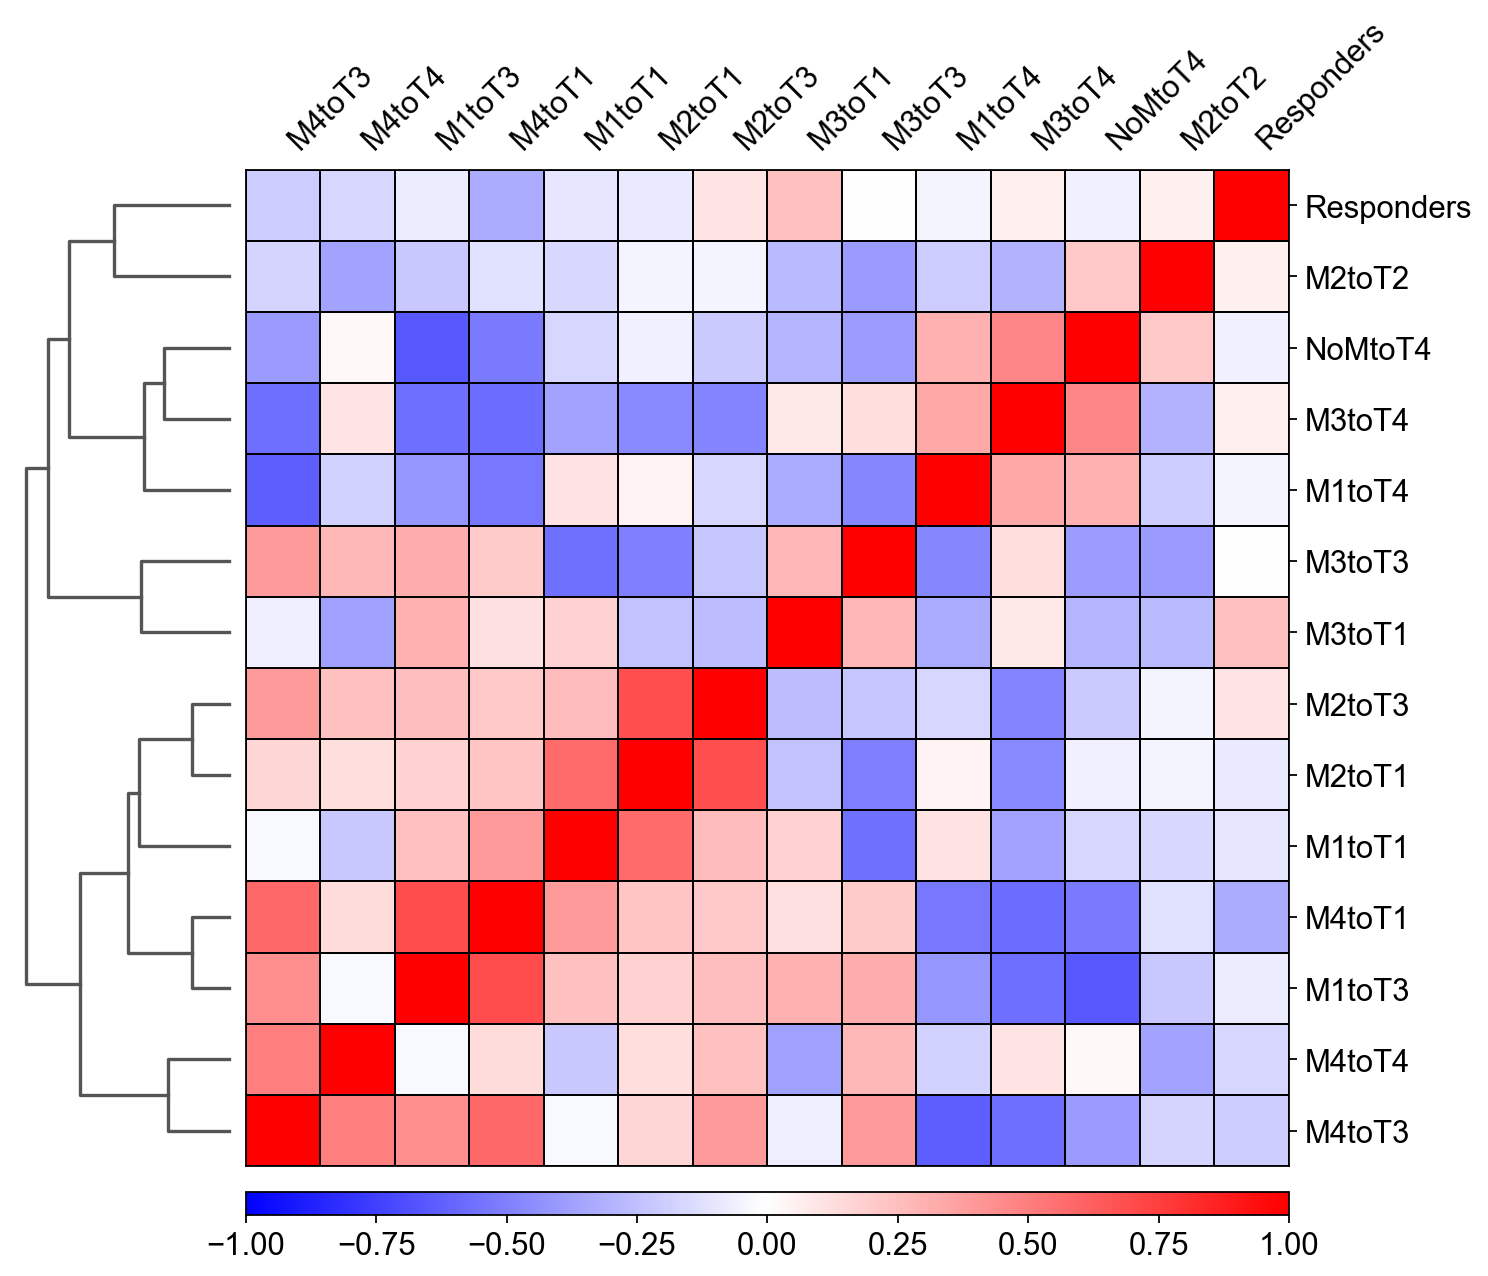

In [21]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata_2, 'class')
sc.pl.correlation_matrix(adata_2, groupby='class')

# with MaT4, MbT2, McT4 and nonresponders

In [35]:
#adata_69_imn = adata_69_imn[adata_69_imn.obs['class'].isin(['M1toT4','M2toT2','M3toT4'])]

In [39]:
adata_PD_NR = adata_PD[adata_PD.obs['class']=='Nonresponders']

In [40]:
adata_3 = adata_69_imn.concatenate(adata_PD_NR)
adata_3

AnnData object with n_obs × n_vars = 186731 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-0

In [41]:
adata_3.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,louvain,batch,total_counts_ribo,...,celltype_detail,patient_cluster,T_patient_cluster,Myeloid_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,file_name,leiden,response
AAACCTGAGCTGCAAG-1-0-0-0,696.0,680,837.446228,22.309502,2.663992,tumor,P686,9,0,97.282417,...,M1 Macrophage,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGAGTAGCCGA-1-0-0-0,3934.0,3875,1451.257568,18.802568,1.295605,tumor,P686,4,0,198.197769,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCAAGAGGCT-1-0-0-0,674.0,668,882.023010,11.229170,1.273115,tumor,P686,4,0,213.666718,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCACTGAAGG-1-0-0-0,720.0,708,966.913330,19.870264,2.055020,tumor,P686,11,0,186.630112,...,B cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
AAACCTGCAGTATCTG-1-0-0-0,1014.0,1000,954.569214,18.788149,1.968233,tumor,P686,4,0,221.148575,...,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGGTCCATCCCG-2-1,209.0,206,1223.831787,31.001398,2.533142,NaN,nonresponder_3,NaN,1,114.988152,...,CD8 T cell,NaN,NaN,NaN,NaN,NaN,Nonresponders,ESCC-D2,7,Nonresponders
TCAACTAAAAAG-2-1,202.0,202,1241.132324,118.082832,9.514121,NaN,nonresponder_3,NaN,1,209.907837,...,Neutrophil,NaN,NaN,NaN,NaN,NaN,Nonresponders,ESCC-D2,0,Nonresponders
CTGAAGACAAAA-2-1,204.0,203,1235.320801,75.052284,6.075530,NaN,nonresponder_3,NaN,1,166.234802,...,CD8 T cell,NaN,NaN,NaN,NaN,NaN,Nonresponders,ESCC-D2,3,Nonresponders
GTTTAATTATTT-2-1,203.0,200,1223.615234,99.878250,8.162554,NaN,nonresponder_3,NaN,1,95.184532,...,Neutrophil,NaN,NaN,NaN,NaN,NaN,Nonresponders,ESCC-D2,0,Nonresponders


In [42]:
adata_3

AnnData object with n_obs × n_vars = 186731 × 9860
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'louvain', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'T_patient_cluster', 'Myeloid_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'file_name', 'leiden', 'response'
    var: 'mt', 'ribo', 'hb', 'gene_ids-0', 'feature_types-10-0', 'feature_types-11-0', 'feature_types-12-0', 'feature_types-13-0', 'feature_types-14-0', 'feature_types-15-0', 'feature_types-16-0', 'feature_types-17-0', 'feature_types-18-0', 'feature_types-19-0', 'feature_types-20-0', 'feature_types-21-0', 'feature_types-3-0', 'feature_types-4-0', 'feature_types-5-0', 'feature_types-6-0', 'feature_types-7-0', 'feature_types-8-0', 'feature_types-9-0', 'feature_types-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-0

In [43]:
adata_3.raw = adata_3

In [44]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata_3, svd_solver='arpack')
sc.pp.neighbors(adata_3, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata_3)
sc.tl.umap(adata_3)

computing PCA
    with n_comps=50
    finished (0:02:01)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:41)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:41)


In [45]:
adata_3.obs['class'] = adata_3.obs['class'].astype('category')
adata_3.obs['class']

AAACCTGAGCTGCAAG-1-0-0-0           M2toT2
AAACCTGAGTAGCCGA-1-0-0-0           M2toT2
AAACCTGCAAGAGGCT-1-0-0-0           M2toT2
AAACCTGCACTGAAGG-1-0-0-0           M2toT2
AAACCTGCAGTATCTG-1-0-0-0           M2toT2
                                ...      
AGGTCCATCCCG-2-1            Nonresponders
TCAACTAAAAAG-2-1            Nonresponders
CTGAAGACAAAA-2-1            Nonresponders
GTTTAATTATTT-2-1            Nonresponders
CATTAATAAAAG-2-1            Nonresponders
Name: class, Length: 186731, dtype: category
Categories (14, object): ['M1toT1', 'M1toT3', 'M1toT4', 'M2toT1', ..., 'M4toT3', 'M4toT4', 'NoMtoT4', 'Nonresponders']

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_class']`


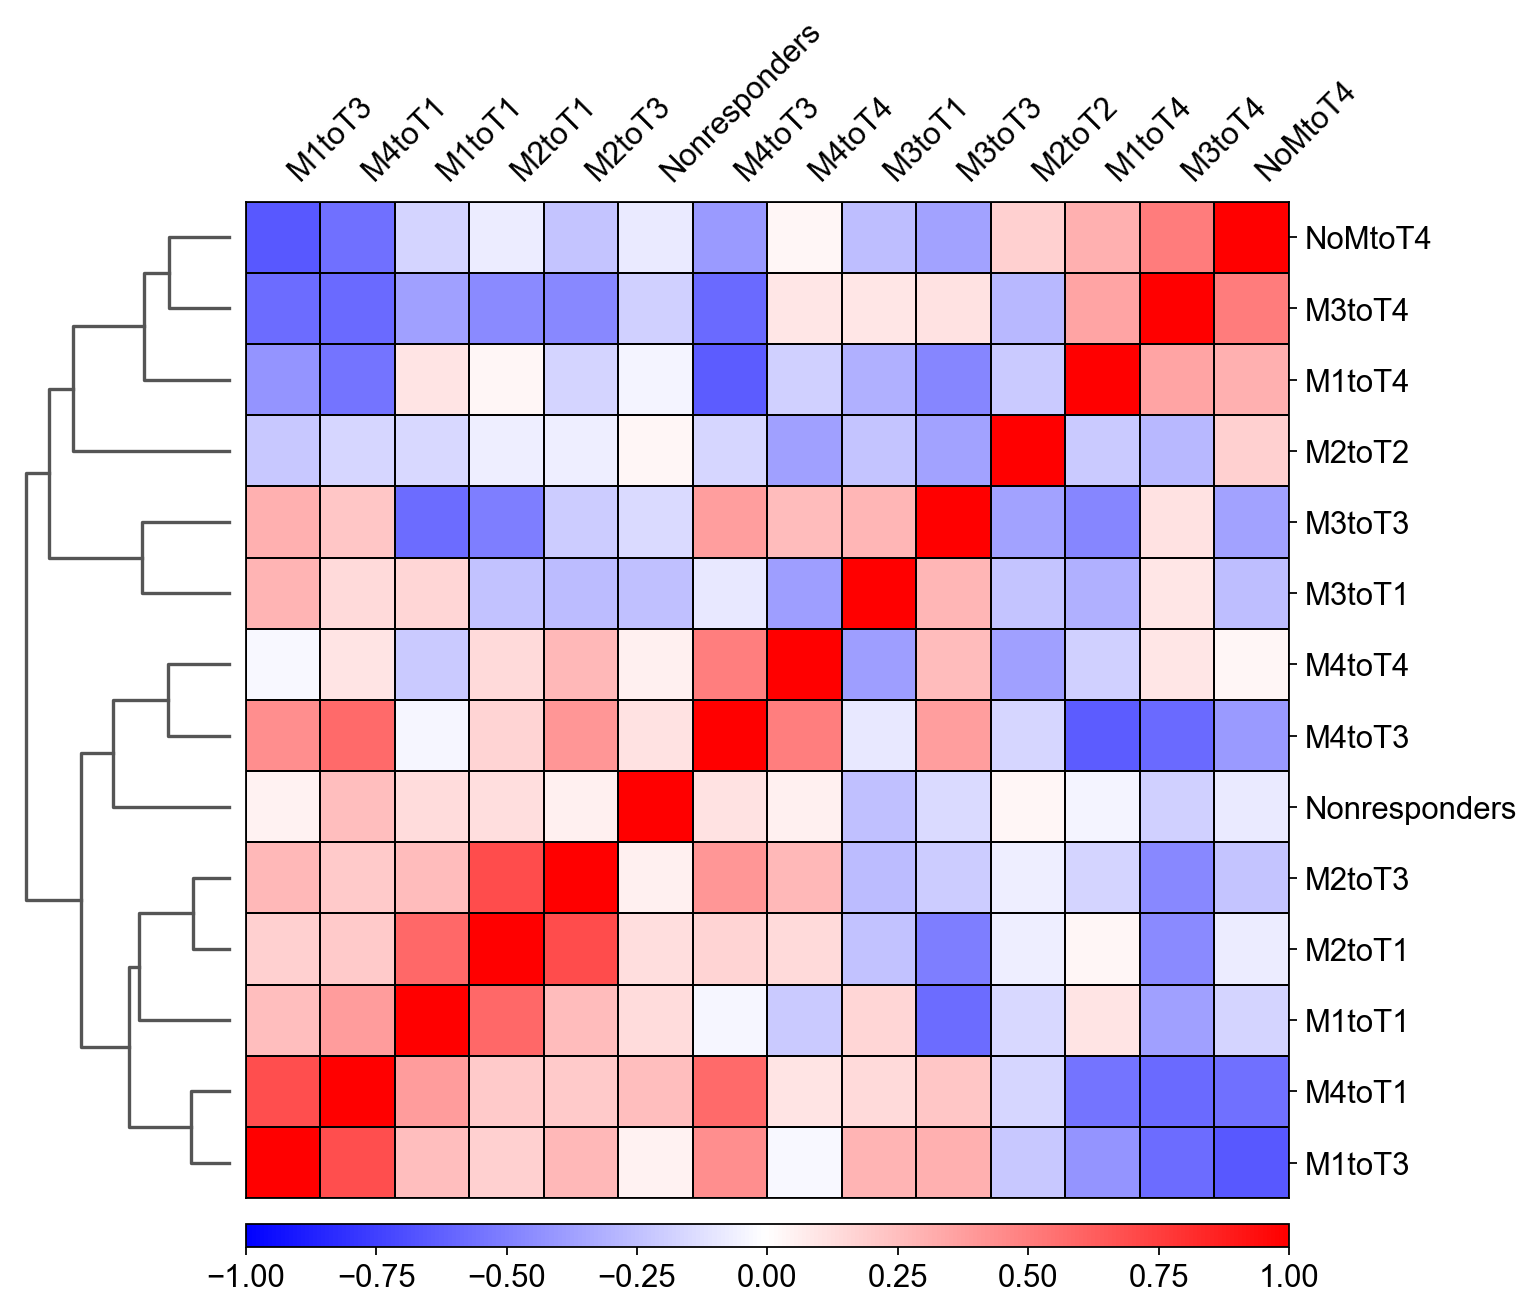

In [46]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata_3, 'class')
sc.pl.correlation_matrix(adata_3, groupby='class')

In [38]:
adata_1.write('Integrated_all_cell_from_69P_and_responders_and_Nonresponders_after_harmony.h5ad', compression='gzip')

In [6]:
adata_1 = sc.read('Integrated_all_cell_from_69P_and_responders_and_Nonresponders_after_harmony.h5ad')